### SVM
- SVM is a powerful classifier that works both on linearly and non - linearly separable data
#### Goal:
- Find an optimal hyperplane, that best separates our data so that the distace from the  nearest points in space to itself(also called margin) is maximized.
- These nearest points are called Support vectors.
- For non -linearly seperable case, it uses something called "Kernel Trick" which will go through in the next part.

Support Vector Machine (SVM) is a supervised machine learning algorithm commonly used for classification and regression tasks. It works by finding the optimal hyperplane that best separates the data points of different classes in the feature space.

### Key Concepts in SVM:
1. **Hyperplane:** 
   - In SVM, the hyperplane is a decision boundary that separates different classes. For two-dimensional data, the hyperplane is a line; for three-dimensional data, it’s a plane; and in higher dimensions, it’s a hyperplane.

2. **Support Vectors:**
   - Support vectors are the data points that are closest to the hyperplane. These points are critical as they influence the position and orientation of the hyperplane. The algorithm tries to maximize the margin between the support vectors and the hyperplane.

3. **Margin:**
   - The margin is the distance between the hyperplane and the nearest support vectors from any class. SVM aims to maximize this margin, leading to better generalization.

4. **Kernel Trick:**
   - When data is not linearly separable, SVM uses a technique called the kernel trick to transform the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes. Common kernels include linear, polynomial, and radial basis function (RBF).

5. **Soft Margin vs. Hard Margin:**
   - In cases where data is not perfectly separable, SVM allows for a soft margin, meaning some data points can be on the wrong side of the hyperplane. The trade-off between maximizing the margin and minimizing classification error is controlled by a regularization parameter, C.

### Applications:
- **Classification:** SVM is widely used in text classification, image classification, and bioinformatics.
- **Regression:** SVM can also be adapted for regression tasks using Support Vector Regression (SVR).

### Advantages:
- Effective in high-dimensional spaces.
- Works well when there’s a clear margin of separation between classes.
- Robust to overfitting, especially in high-dimensional spaces.

### Disadvantages:
- Not suitable for large datasets because the training time complexity is high.
- Less effective on noisier datasets where classes overlap.
- Choosing the right kernel can be complex.

Would you like to dive deeper into a specific aspect of SVM or have any particular application in mind?

### Hyperplane :
- Seperating Hyperplane : Which can correctly classify and seperate the points
- - Seperating hyperplane : condition must match
- wx + b > 0 for all data point in class 1 and
- wx + b < 0 for all data point in class 0.
- #### Maximum Margin Hyperplane:
- An optimal hyperplane best seperates our data so that the distance/margin from nearest point(called SV) in space to itself is maximized.


### Generate Dataset

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,Y = make_classification(n_classes=2, n_features=2, n_informative= 1, n_samples = 500, n_redundant=0, n_clusters_per_class=1)

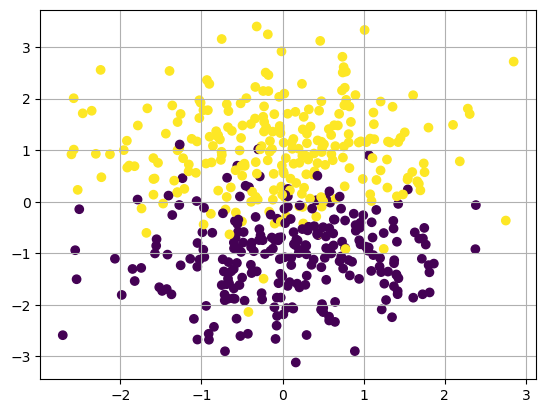

In [5]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.grid()

plt.show()

In [6]:
class SVM :
    def __init__(self, C = 1.0): # constructor
    # C -- by default 1 , penalizing the algorithm
        self.C = C
        self.w = 0
        self.b = 0

    def hindge_loss(self, W, b, X, Y):
        loss = 0.0
        loss += 0.5*np.dot(W, W.T)
        #here we didn't take error due to outlier
        #this is the initial error

        m = X.shape[0] # no. of examples

        for i in range(m):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            #ti here is scalar entity
            loss += self.C* max(0, (1-ti))
            # this loss is after we consider outliers 
        return loss

    def fit(self, X, Y, batch_size = 20, learning_rate = 0.01):
        no_of_features = X.shape[1]# extracrting how many features 
        no_of_samples  = X.shape[0] # and the examples we have
        n = learning_rate
        c = self.C # coefficient of penality
        
 #Initialise the model parameters
        W = np.zeros((1, no_of_features))# row vector
        bias = 0
        print(self.hindge_loss(W, bias, X, Y)) # hindge loss in beginning
#Training          
            

In [7]:
mySVM = SVM()

In [8]:
print(X.shape)

(500, 2)


In [9]:
mySVM.fit(X,Y)# So, inital loss is 500  here it is matrix, so 
# we should return 500 as a scalar for that we should return
# loss[0][0] as it is an inital loss though

[[500.]]


In [10]:
class SVM :
    def __init__(self, C = 1.0): # constructor
    # C -- by default 1 , penalizing the algorithm
        self.C = C
        self.w = 0
        self.b = 0

    def hindge_loss(self, W, b, X, Y):
        loss = 0.0
        loss += 0.5*np.dot(W, W.T)

        m = X.shape[0]

        for i in range(m):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            # ti here is scalar entity
            loss += self.C* max(0, (1-ti))
        return loss[0][0] # why ??? because W*WT would be a scalar quantity

    def fit(self, X, Y, batch_size = 20, learning_rate = 0.01):
        no_of_features = X.shape[1]# extracrting how many features 
        no_of_samples  = X.shape[0] # and the examples we have
        n = learning_rate
        c = self.C # coefficient of penality
        
 #Initialise the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        print(self.hindge_loss(W, bias, X, Y)) # hindge loss in beginning
#Training          
            

In [11]:
mySVM = SVM()

In [12]:
mySVM.fit(X, Y)# it is an scalar 

500.0


- In SVM we convert our label into [1, -1]

In [13]:
print(Y)

[1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 

#### Converting labels in -1 and 1 form :

In [14]:
Y == 0

array([False, False, False, False,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True, False,

In [15]:
Y[Y == 0] = -1 ### Concept of  Broadcasting 

In [16]:
print(Y)

[ 1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1
 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1  1
  1  1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1 -1
  1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1
 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1
  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1
 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1
 -1 -1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1
 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1
 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1
 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1

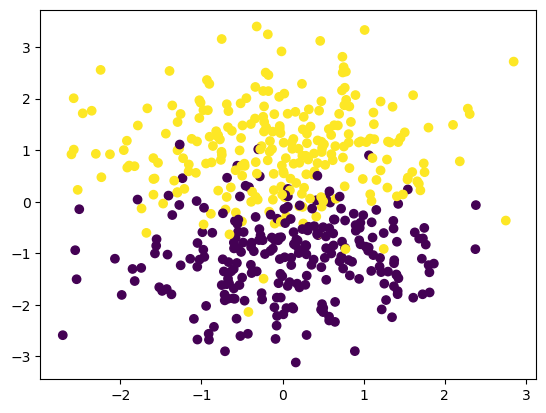

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

In [18]:
mySVM.fit(X, Y)# initial loss

500.0


In [19]:
class SVM :
    def __init__(self, C = 1.0): # constructor
    # C -- by default 1 , penalizing the algorithm
        self.C = C
        self.w = 0
        self.b = 0

    def hindge_loss(self, W, b, X, Y):
        loss = 0.0
        loss += 0.5*np.dot(W, W.T)

        m = X.shape[0]

        for i in range(m):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            # ti here is scalar entity
            loss += self.C* max(0, (1-ti))
        return loss[0][0] # why ??? because W*WT would be a scalar quantity

    def fit(self, X, Y, batch_size = 20, learning_rate = 0.01, max_itr = 100):
        no_of_features = X.shape[1]# extracrting how many features 
        no_of_samples  = X.shape[0] # and the examples we have
        n = learning_rate
        c = self.C # coefficient of penality
        
 #Initialise the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        print(self.hindge_loss(W, bias, X, Y)) # hindge loss in beginning

#Training from here..
# weight and the Bias update rule that we discussed.
        losses =[] # all the loss
        
# training loop
        for i in range(max_itr):
            l = self.hindge_loss(W, bias, X, Y)
            losses.append(l)
# random shuffling of training examples for batch gradient descent            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids) # shuffle the data

# Batch Gradient Descent  with random suffling 
            
            for batch_start in range(0, no_of_samples, batch_size):
             #Assume 0 gradient for the batch , why ?
                gradw = 0 #gradient with respect to w delta_w of (loss)
                gradb = 0 #grad with respect to bias


        
                #Iterate over all examples in the mini batch 
                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        #In one id I guess we will batch_size no.of examples
                        #here what I did is I assigned the value i now like 57
                        #even it was before 47 or 397 while going through
                        #the four loop.
                        ti = Y[i]*(np.dot(W, X[i].T) + bias)
                    if ti > 1: # gradient of w and b is zero
                        gradw += 0
                        gradb += 0
                    else :
                        gradw +=  c*Y[i]*X[i]
                        gradb +=  c*Y[i]
                #Gradient for the batch is ready! Update W, B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        
        self.W = W
        self.b = bias
        return W, bias, losses
        
                    
            



In [20]:
mySVM = SVM()

In [21]:
w,b,losses =mySVM.fit(X, Y)
print(losses)

500.0
[500.0, 138.44006139505436, 133.99871708295447, 133.21014934903866, 132.6823626017654, 132.79518170685742, 132.47029151041787, 132.70677370686025, 132.1270243652861, 131.52729354685468, 131.70453862492275, 132.31020910504586, 132.96543283657317, 133.48781455809913, 133.24473720400465, 133.9199722112556, 132.3428402298148, 132.40585560477837, 133.10790426876946, 133.44552284262892, 133.11151178197244, 132.2394440596995, 132.07475368132654, 131.04757889893116, 132.33057619298347, 132.22973252594846, 132.7009647552818, 131.58015881640813, 133.27839917133605, 132.7352261098364, 131.93699686678175, 132.65406629658455, 131.74789857357078, 132.87321347338886, 131.58232061446765, 132.82522167895772, 132.5672957321034, 132.49153785923156, 133.2118746234113, 132.05155205300994, 131.79868869646037, 131.82572042564018, 131.28078199172742, 131.36066001119607, 131.71437520135268, 132.80925393123488, 133.2560130604476, 133.38118195627206, 132.37749931091295, 132.1059562799799, 132.1831522882688

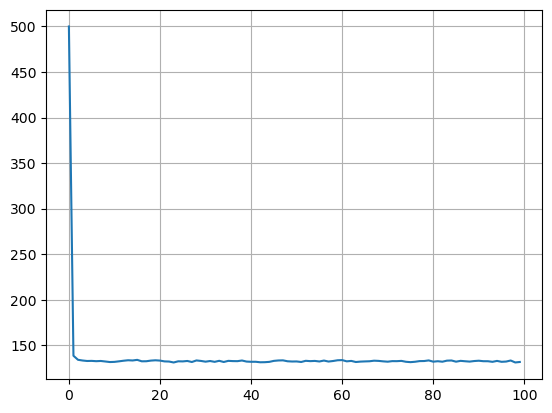

In [22]:
plt.plot(losses)
plt.grid()
plt.show()

In [23]:
w,b,losses =mySVM.fit(X, Y)

500.0


In [24]:
print(losses)

[500.0, 137.34557454389974, 134.15159021277688, 132.48611635018972, 131.4713527943252, 132.48668499307735, 132.3697531454095, 132.73195223308343, 133.4248554354449, 132.88042678203394, 133.17484718886342, 131.68183715113895, 132.35475994626964, 132.48883657046485, 132.58627813799455, 133.42293159646246, 132.1373387018824, 132.16796798837117, 131.83880446692058, 131.55890945580538, 133.08126042173777, 132.67693596778193, 132.5551403248452, 132.08628526841827, 132.9824434685548, 132.82712752116478, 131.88396394093627, 131.52486226493278, 132.90413668206284, 131.72129567456184, 132.0577998185727, 131.65385740473118, 132.80266895538077, 131.61580353447232, 131.49271758453696, 131.96163055172065, 132.6003632103284, 132.930175991988, 132.1048090833272, 131.40999330451504, 131.92335355987302, 131.6594884517949, 132.24487060262462, 132.9557352784589, 133.40868779502273, 131.42819871460793, 131.73222462399056, 132.88711827249773, 131.55813591641962, 131.4523816204335, 132.99323168986697, 132.80

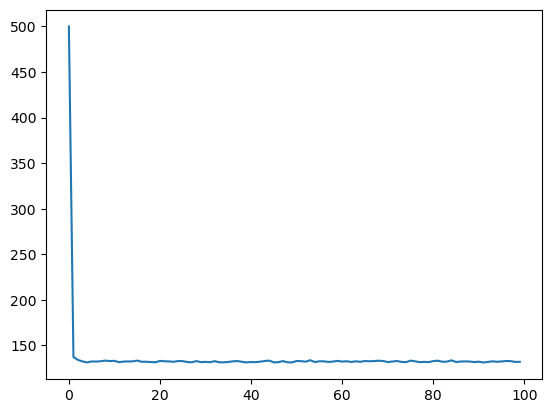

In [25]:
plt.plot(losses)
plt.show()

In [26]:
print(losses[0], losses[-1])

500.0 132.0613180471622


In [27]:
W, B = mySVM.W, mySVM.b
print(W, B) # w1 and w2 , b = -0.21
print(w.ndim)

[[-0.08370288  1.3849505 ]] 0.04999999999999999
2


### Plotting of Decision Boundar or Hyperplane

In [28]:
def plotHyperplane(w1, w2, b):# why bec : W has w1 and w2 as two parameters
    plt.scatter(X[:,0], X[:,1], c =Y)
    plt.grid()
    plt.show()

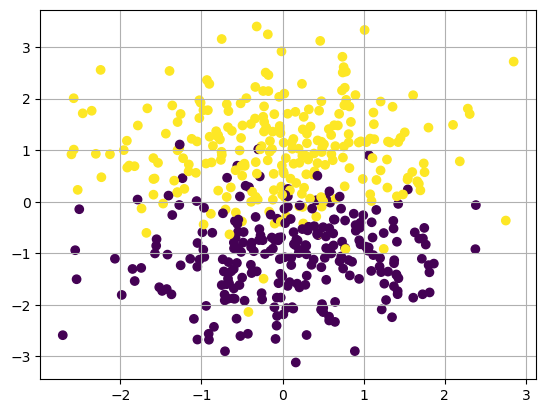

In [29]:
plotHyperplane(W[0][0], W[0][1], B) 
#w1 = w[0][0]
#w2 = w[0][1]

- w1x1 + w2x2 + b = 0
- x2 = - (w1x1 +b)/w2
- If I have some dummy data for x1 , I can generate dummy data for x2
- Then I can draw my line

#### Creating a dummy data

In [30]:
def plotHyperplane(w1, w2, b):# why? bec: w1 and w2 as two parameters
    x1 = np.linspace(-2, 4, 10)# I can take anything 
    x2 = -(w1*x1 + b)/w2
    
    plt.scatter(X[:,0], X[:,1], c =Y)
    plt.plot(x1, x2)
    plt.grid()
    plt.show()
   

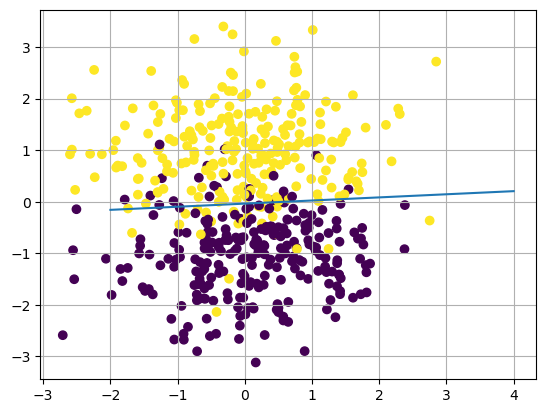

In [31]:
plotHyperplane(W[0][0], W[0][1], B)

### Visualize Decision Boundaries(DB) and Plotting of DB and Effect of Changing "C" - Penality Constant

In [32]:
def plotHyperplane(w1, w2, b):# why? bec: w1 and w2 as two parameters
    plt.figure(figsize=(12,8))
    x1 = np.linspace(-2, 4, 10)# I can take anything 
    x2 = -(w1*x1 + b)/w2
    # plotting for positive and negative Hyperplane
    xp =  -(w1*x1 + b + 1)/(w2)
    xn =  -(w1*x1 + b -1)/(w2)
    plt.scatter(X[:,0], X[:,1], c =Y)
    plt.plot(x1, x2)
    plt.plot(x1, xp)
    plt.plot(x1, xn)
    plt.grid()
    plt.show()

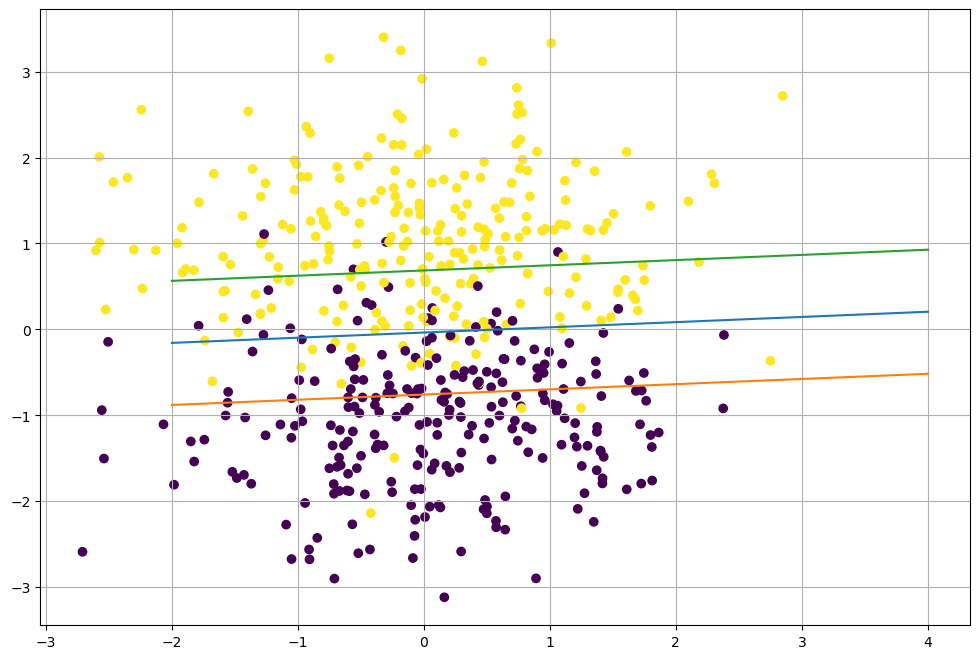

In [33]:
plotHyperplane(W[0][0],W[0][1], B)

### What if I increment my penality :

100000.0
100000.0 43310.4402334701


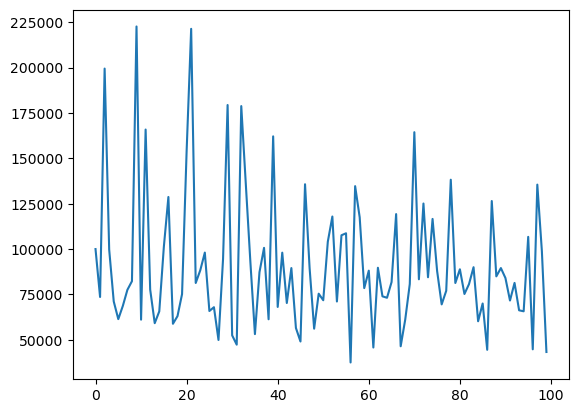

In [34]:
mySVM = SVM(C = 200)
w,b,losses = mySVM.fit(X, Y)
print(losses[0], losses[-1])
plt.plot(losses)
plt.show()

In [35]:
W, B = mySVM.W, mySVM.b
print(W, B) # weight terms are also very high
print(w.ndim)

[[-3.15590929 12.05486486]] -4.0
2


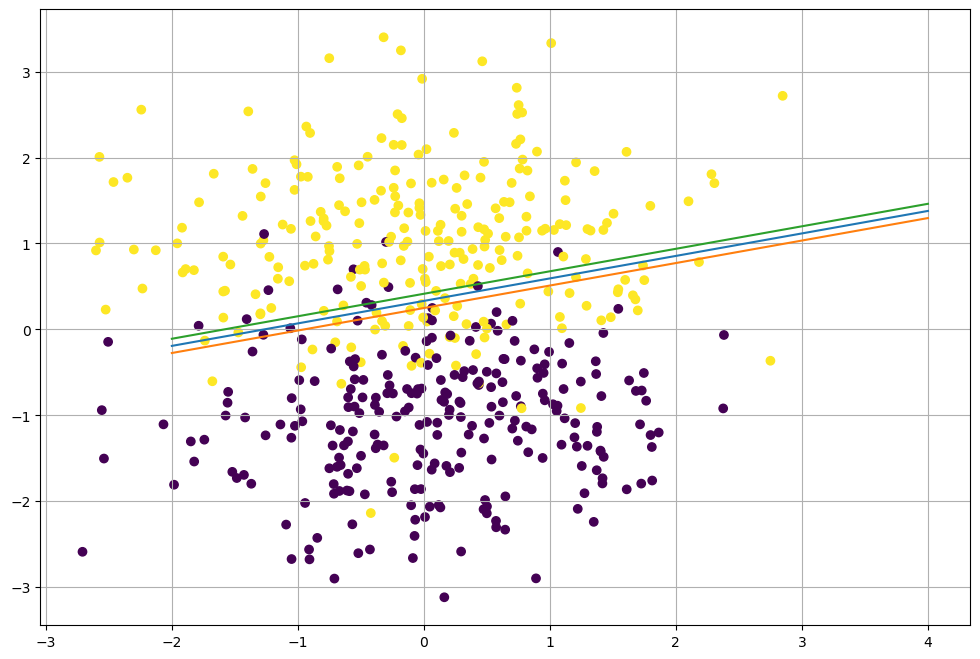

In [36]:
def plotHyperplane(w1, w2, b):# why? bec: w1 and w2 as two parameters
    plt.figure(figsize=(12,8))
    x1 = np.linspace(-2, 4, 10)# I can take anything 
    x2 = -(w1*x1 + b)/w2
    # plotting for positive and negative Hyperplane
    xp =  -(w1*x1 + b + 1)/(w2)
    xn =  -(w1*x1 + b -1)/(w2)
    plt.scatter(X[:,0], X[:,1], c =Y)
    plt.plot(x1, x2)
    plt.plot(x1, xp)
    plt.plot(x1, xn)
    plt.grid()
    plt.show()
plotHyperplane(W[0][0],W[0][1], B)

### Gird Search :

### Handling Non- linearaly Separable Data :
- Key idea is to  project the data to higher dimentions
- So that they are linearly separable
  

In [37]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [38]:
X, Y = make_circles(n_samples = 1000, noise = 0.02)
print(X.shape, Y.shape)

(1000, 2) (1000,)


In [39]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

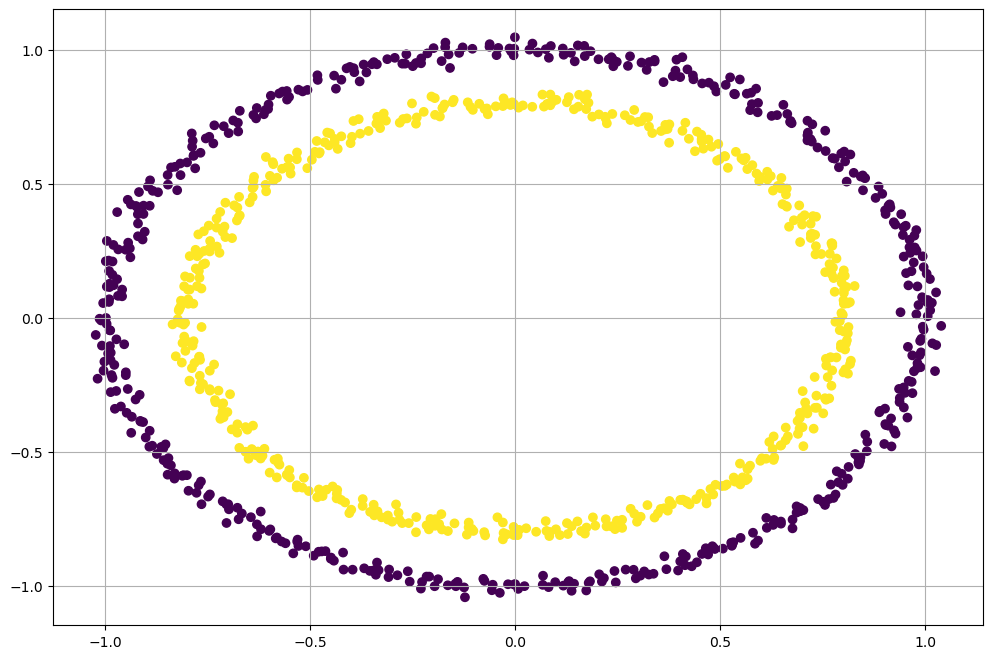

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c= Y)

plt.grid()
plt.show()

- Projecting into the higher dimention
- It is  a non- linear transformation
- x1, x2  to x1, x2, x3 , where x3 is = x1^2 + x2^2
- We dont know what non- linear tranformation.

In [41]:
def phi(variable):
    """ apply some non - linear transformation"""
    x1 = X[:, 0]
    x2 = X[:, 1]
    x3 = x1**2 + x2**2
    X_ = np.zeros((variable.shape[0],3)) # creating a new matrix of (1000, 3)
    print(X_.shape)
    X_[:, 0:2] = variable
    X_[:, -1]  = x3
    return X_

In [42]:
phi(X)

(1000, 3)


array([[ 0.56616066,  0.55534248,  0.62894316],
       [ 0.90405896, -0.39983495,  0.97719059],
       [ 0.7916326 , -0.04571216,  0.62877178],
       ...,
       [ 0.94746315,  0.33822873,  1.01208509],
       [-0.10223815, -0.79497143,  0.64243221],
       [-0.44206006,  0.90418285,  1.01296374]])

In [43]:
X_ = phi(X)

(1000, 3)


In [44]:
X_

array([[ 0.56616066,  0.55534248,  0.62894316],
       [ 0.90405896, -0.39983495,  0.97719059],
       [ 0.7916326 , -0.04571216,  0.62877178],
       ...,
       [ 0.94746315,  0.33822873,  1.01208509],
       [-0.10223815, -0.79497143,  0.64243221],
       [-0.44206006,  0.90418285,  1.01296374]])

In [45]:
print(X_[0:3, :])
print(X[0: 3, :])

[[ 0.56616066  0.55534248  0.62894316]
 [ 0.90405896 -0.39983495  0.97719059]
 [ 0.7916326  -0.04571216  0.62877178]]
[[ 0.56616066  0.55534248]
 [ 0.90405896 -0.39983495]
 [ 0.7916326  -0.04571216]]


In [46]:
def plot3d(X):
    fig = plt.figure(figsize =(12,8))
    ax  = fig.add_subplot(111, projection = "3d")
    x1 =  X[:, 0]
    x2 =  X[:, 1]
    x3 =  X[:, 2]
    ax.scatter(x1, x2, x3, zdir = "z", s= 20, c=Y, depthshade = True)
    # depth shade is used to add transperacy to the pixels 
    # zdir is defalut z and what s = 20 ??
    plt.show()
    return ax

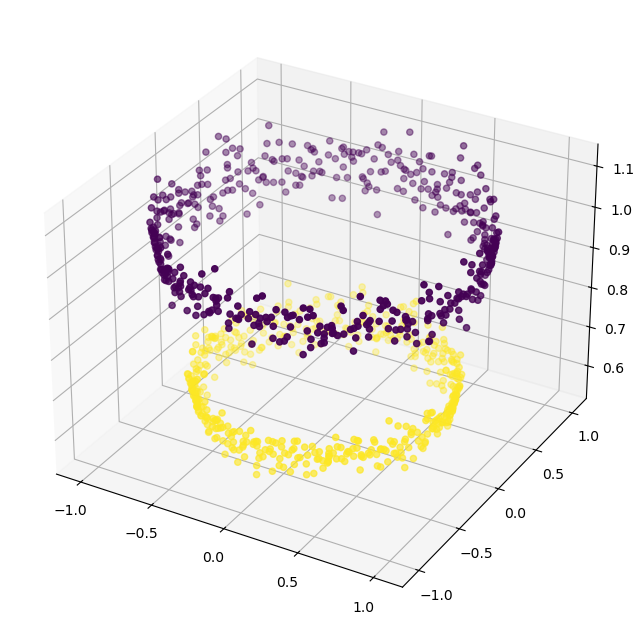

In [47]:
ax = plot3d(X_)

### Logistic Classifier 
- To check , how our  linear projection/ linear classifier  performed

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [49]:
lr = LogisticRegression()

In [50]:
cross_val_score?


Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [51]:
acc = cross_val_score(lr, X, Y, cv = 5)
print(acc.mean())
# Performance is  bad  when done in 2d? what is cross validation

0.47300000000000003


In [52]:
acc = cross_val_score(lr, X_, Y, cv = 5)
print(acc)
print(acc.mean())
print(acc.mean()*100)
# so accuracy is 100 % when projected in 3d

[1. 1. 1. 1. 1.]
1.0
100.0


### Visualize The Decision Surface

In [53]:
lr.fit(X_, Y)

LogisticRegression()

In [54]:
wts =lr.coef_# w0 , w1, w2
print(wts)

[[-1.89492775e-02 -9.74439330e-03 -1.38437969e+01]]


In [55]:
bias =lr.intercept_ # bias 
print(bias)

[11.33836686]


- w0x + w1y + w2z + b

###  Generating data for x and y : To caluclate z !!

In [56]:
xx, yy = np.meshgrid(range(-2,2), range(-2,2))
print(xx)
print(yy) # whyt we created that

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [57]:
z = -( wts[0, 0]*xx + wts[0, 1]*yy + bias)/ (wts[0,2])
print(z) # also a matrix 
# Now I have xx , yy and z as the matrices

[[0.82316681 0.82179802 0.82042923 0.81906044]
 [0.82246293 0.82109414 0.81972535 0.81835656]
 [0.82175905 0.82039026 0.81902147 0.81765267]
 [0.82105517 0.81968638 0.81831758 0.81694879]]


In [58]:
def plot3d(X, show = True):
    fig = plt.figure(figsize =(12,8))
    ax  = fig.add_subplot(111, projection = "3d")
    x1 =  X[:, 0]
    x2 =  X[:, 1]
    x3 =  X[:, 2]
    ax.scatter(x1, x2, x3, zdir = "z", s= 20, c=Y, depthshade = True)
    # depth shade is used to add transperacy to the pixels 
    # zdir is defalut z and what s = 20 ??
    if( show == True):
        plt.show()
    return ax
# Trying to draw over the same graph


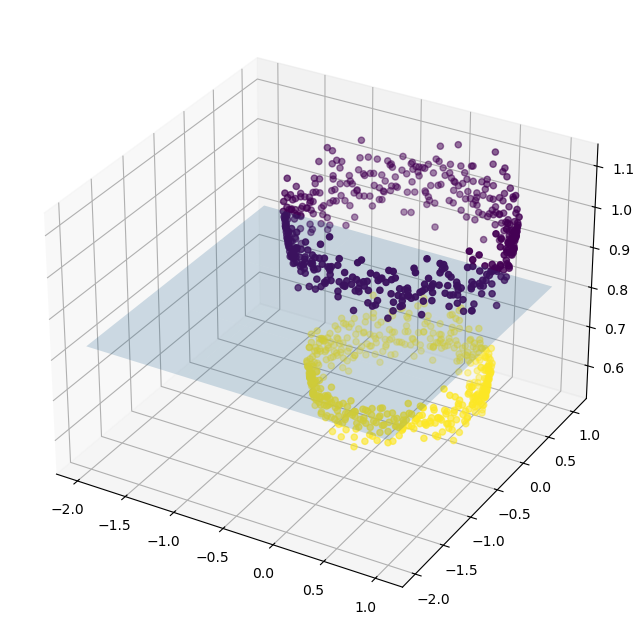

In [59]:
ax = plot3d(X_, False)
ax.plot_surface(xx, yy, z, alpha = 0.2)
plt.show()

In [60]:
pip --version

pip 23.3.1 from /opt/anaconda3/lib/python3.11/site-packages/pip (python 3.11)
Note: you may need to restart the kernel to use updated packages.


### Kernel Based Classification in SVM's
- Sklearn supports the following types of kernels , which can be used in many real life problems

- ### SVc , uSVc, LinearSVC
- are classes capable of performing muticlass classififcation

### Kernel Based Classification in SVM's
- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel
- Kernel trick is a method of using a lineart classifier to solve a non linear problem. It transforms the linearly inseperable data into linearly seperable one.
  

In [61]:
from sklearn import svm

In [62]:
svc = svm.SVC()

In [64]:
svc.fit(X, Y)

SVC()

In [66]:
svc.score(X, Y)*100 # Using RBF kernel - radial based Kernel

100.0

In [73]:
svc = svm.SVC(kernel="linear")

In [74]:
svc.fit(X,Y)

SVC(kernel='linear')

In [75]:
svc.score(X, Y)*100 

50.1

In [77]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X, Y)*100 

53.5

In [83]:
svc = svm.SVC(kernel="sigmoid")
svc.fit(X,Y)
svc.score(X, Y)*100 


49.4

In [84]:
svc = svm.SVC(kernel="precomputed")# matrix should be a square matrix
svc.fit(X,Y)
svc.score(X, Y)*100 

### CUSTOM KERNEL

In [90]:
def custom_kernel(x1, x2):
    return np.square(np.dot(x1, x2.T))

svc = svm.SVC(kernel = custom_kernel)
svc.fit(X, Y)
svc.score(X, Y)

1.0

### Grid Search for  Best Hyperparameters

In [91]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm

- Trying to find the best hyparameters for our model`

In [92]:
param = [ { "kernel" : ['linear', 'rbf', 'poly', 'sigmoid'], 
           "C" : [0.1, 0.2, 0.5, 1.0, 5.0]
          }
        ]

### Dataset Prepare

In [93]:
data = load_digits()

In [102]:
X = data.data
Y = data.target
print(X.shape, Y.shape)
print(X[0:2, 0:10])
print(Y[0:10])

(1797, 64) (1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]]
[0 1 2 3 4 5 6 7 8 9]


- We will work for logistic regression and SVM

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [105]:
lr = LogisticRegression()

In [106]:
lr.fit(X, Y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
cross_val_score(lr, X, Y, scoring= "accuracy", cv = 5).mean()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.9137650882079852

In [108]:
from sklearn import svm


In [111]:
svc = svm.SVC()
svc.fit(X,Y)
cross_val_score(svc, X, Y, scoring = "accuracy", cv = 5).mean()

0.9632838130609718

### Finding Right set of Hyperparameters for SVM work properly:
- Using Grid Search

In [112]:
import multiprocessing

In [115]:
cpus = multiprocessing.cpu_count()
cpus

8

In [117]:
gs = GridSearchCV(estimator=svm.SVC(), param_grid= param, scoring="accuracy", cv = 5, n_jobs= cpus)

In [ ]:
gs.fit